In [164]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib.ticker import EngFormatter
fmt = EngFormatter(places=0)
%matplotlib inline

In [165]:
movies = pd.read_csv('tmdb_5000_movies.csv')
credits = pd.read_csv('tmdb_5000_credits.csv')

In [166]:
movies['genre 1'] = np.nan
movies['genre 2'] = np.nan
movies['genre 3'] = np.nan
movies['genre 4'] = np.nan
movies['genre 5'] = np.nan
movies['genre 6'] = np.nan
movies['genre 7'] = np.nan

In [167]:
def create_genres(movie):
    genres = eval(movie['genres'])
    for i, gen in enumerate(genres):
        movie.loc[f'genre {i+1}'] = gen['name']
    return movie

movies = movies.apply(lambda x: create_genres(x), axis=1)
# a = eval(movies.loc[0]['genres'])
# a = eval(movies.loc[0]['genres'][1:29])


In [168]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,title,vote_average,vote_count,genre 1,genre 2,genre 3,genre 4,genre 5,genre 6,genre 7
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,Avatar,7.2,11800,Action,Adventure,Fantasy,Science Fiction,NaN,NaN,NaN
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,Pirates of the Caribbean: At World's End,6.9,4500,Adventure,Fantasy,Action,NaN,NaN,NaN,NaN
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,Spectre,6.3,4466,Action,Adventure,Crime,NaN,NaN,NaN,NaN
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,The Dark Knight Rises,7.6,9106,Action,Crime,Drama,Thriller,NaN,NaN,NaN
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,John Carter,6.1,2124,Action,Adventure,Science Fiction,NaN,NaN,NaN,NaN


In [169]:
# movies.columns

genre_list = ['genre 1', 'genre 2', 'genre 3', 'genre 4', 'genre 5',
       'genre 6', 'genre 7']

# # genres_sum = movies['genre 1']
# pd.concat(movies[[genre_list]], axis=1)
# type(movies[genre_list])
# for genre in genre_list[1:]:
#     genres_sum = genres_sum.concat(movies[genre])
    
# len(genres_sum)
# pd.concat()

In [170]:
genres_sum = movies[genre_list].melt().dropna()['value']


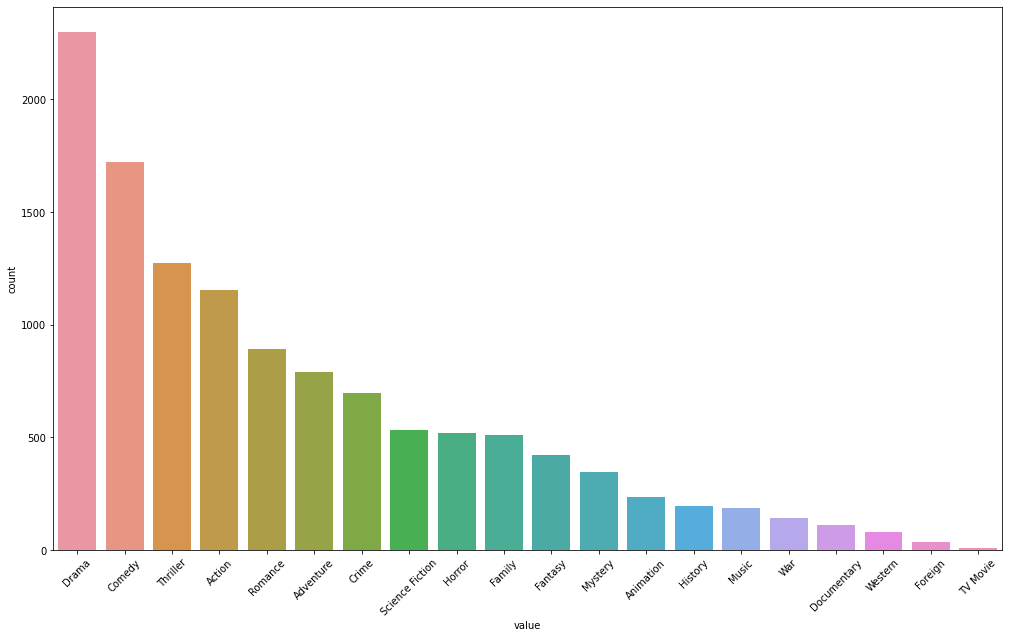

In [171]:
fig, axs = plt.subplots(figsize=(17,10))
sns.countplot(x=genres_sum,order=genres_sum.value_counts().index)
axs.tick_params(axis='x', rotation=45)

# genres_sum

In [172]:
credits.drop('title',axis=1,inplace=True)
credits.rename({"movie_id":"id"},inplace=True,axis=1)
df = pd.merge(movies,credits,on='id')

C:\Users\Daniel\AppData\Local\Temp\ipykernel_9972\823180860.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='plasma_r')


<AxesSubplot:>

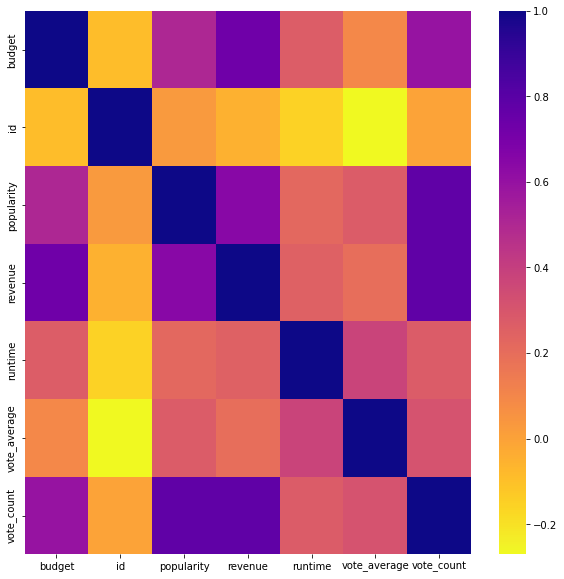

In [173]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cmap='plasma_r')

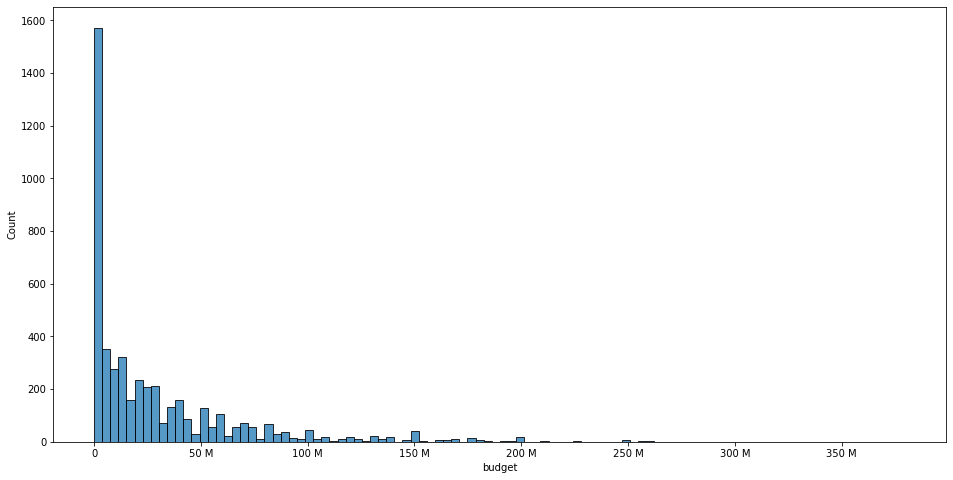

In [174]:
fig, ax = plt.subplots(figsize=(16,8))
fig = sns.histplot(data=df,x='budget', bins=100)
ax.xaxis.set_major_formatter(fmt)

In [175]:
df['vote_count'].describe()

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64

In [176]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'genre 1', 'genre 2', 'genre 3', 'genre 4', 'genre 5',
       'genre 6', 'genre 7', 'cast', 'crew'],
      dtype='object')

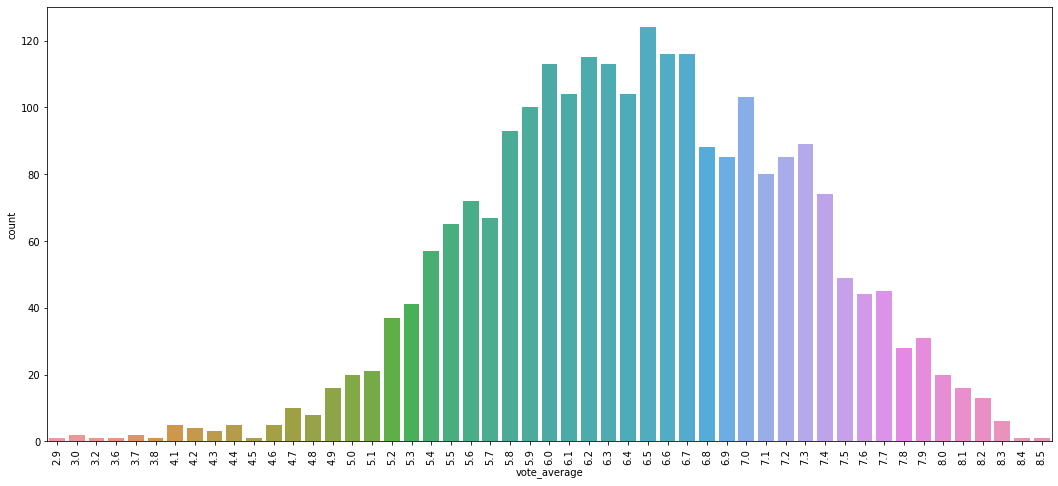

In [177]:
# df['vote_count'][1]>100
fig, ax = plt.subplots(figsize=(18,8))
votes = df[df['vote_count']>df['vote_count'].median()][genre_list+['id','vote_average']].sort_values(by='vote_average', ascending=False)
sns.countplot(data=votes,x='vote_average')
ax.tick_params(axis='x', rotation=90)
# df[df['vote_count']>100]

In [178]:
votes.head()
drama_votes = votes[votes.apply(lambda x: x.isin(['Drama']).any(),axis=1)==True]
comedy_votes = votes[votes.apply(lambda x: x.isin(['Comedy']).any(),axis=1)==True]
thriller_votes = votes[votes.apply(lambda x: x.isin(['Thriller']).any(),axis=1)==True]
horror_votes = votes[votes.apply(lambda x: x.isin(['Horror']).any(),axis=1)==True]

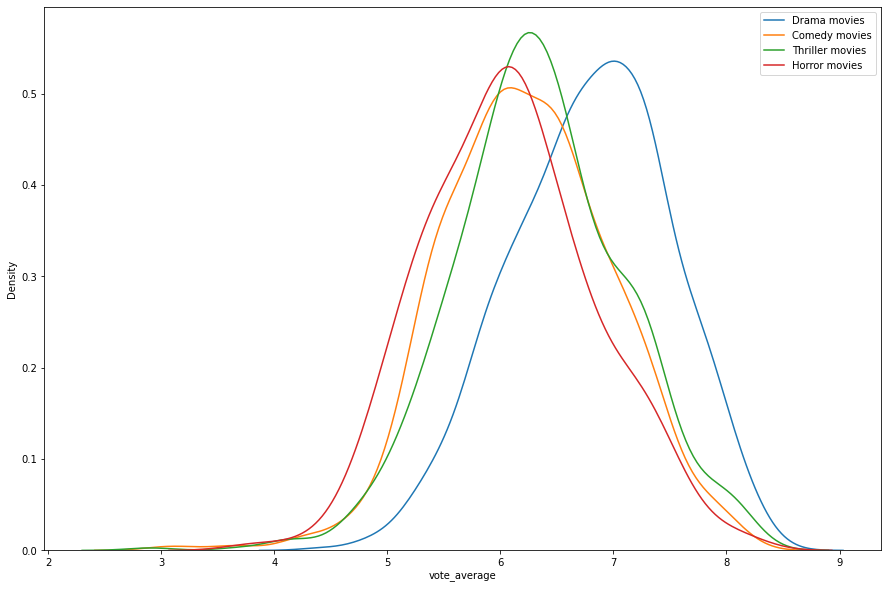

In [179]:
fig, ax = plt.subplots(figsize=(15,10))
sns.kdeplot(drama_votes['vote_average'])
sns.kdeplot(comedy_votes['vote_average'])
sns.kdeplot(thriller_votes['vote_average'])
sns.kdeplot(horror_votes['vote_average'])
plt.legend(labels=['Drama movies','Comedy movies','Thriller movies','Horror movies'])

<Figure size 1224x432 with 0 Axes>

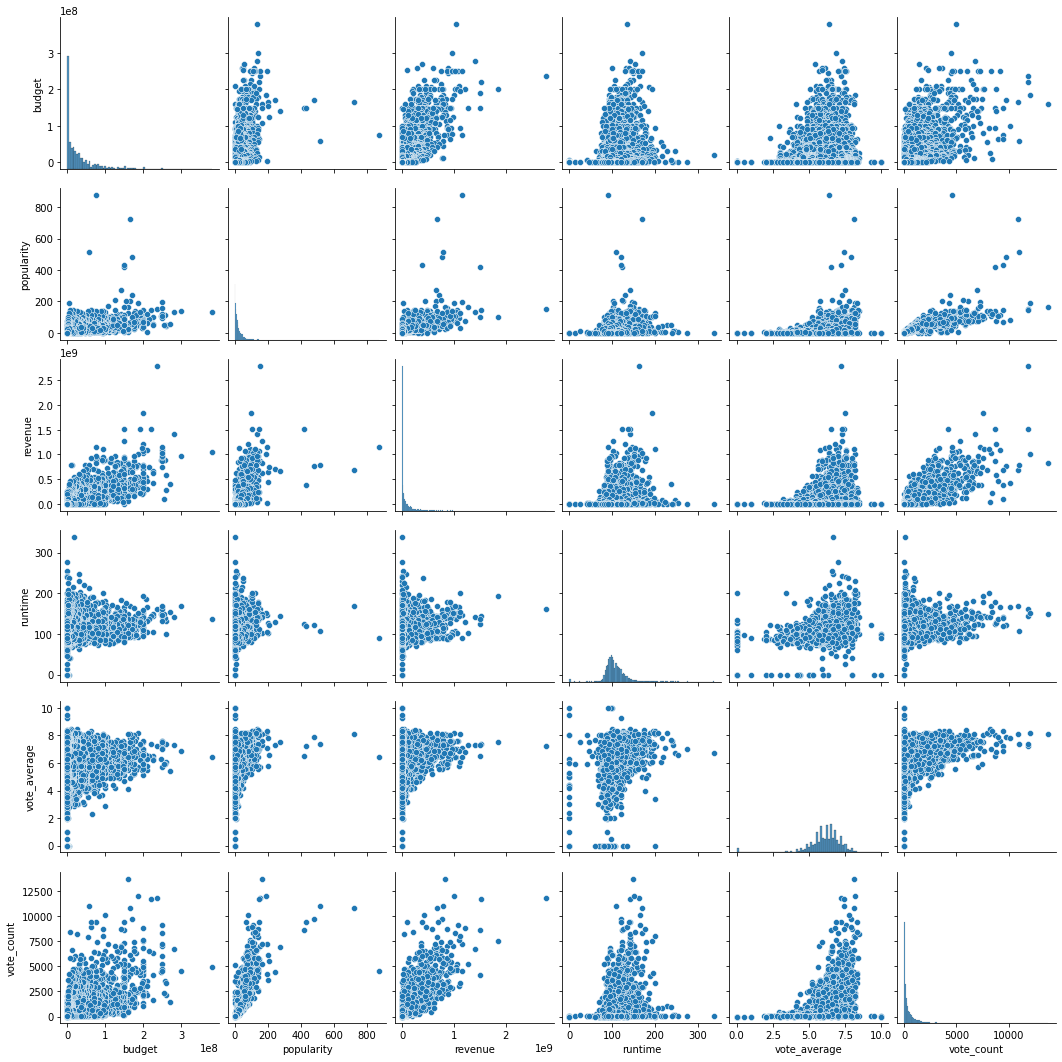

In [180]:
plt.figure(figsize=(17,6))
# sns.scatterplot(x=df['vote_count'],y=df['vote_average'])
sns.pairplot(data=df.drop('id',axis=1))

<AxesSubplot:xlabel='runtime', ylabel='vote_average'>

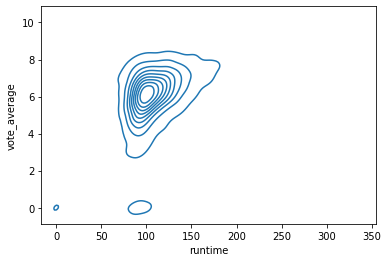

In [181]:
sns.kdeplot(data=df, x='runtime',y='vote_average')

<AxesSubplot:xlabel='original_language', ylabel='count'>

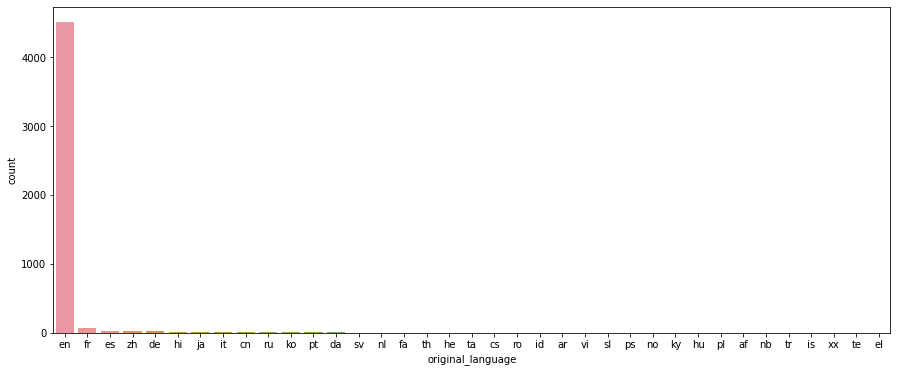

In [182]:
plt.figure(figsize=(15,6))
sns.countplot(data=df, x='original_language', order=df['original_language'].value_counts().index)

In [183]:
df = df[df['original_language']=='en']

In [184]:
# a = eval(df[df['id']==22215]['production_companies'].iloc[0])
# eval(a.iloc[0])
def create_prod_comps(movie):
    prods = eval(movie['production_companies'])
    for i, comp in enumerate(prods):
        movie.loc[f'prod {i+1}'] = comp['name']
    return movie

df_prods = movies.apply(lambda x: create_prod_comps(x), axis=1)

In [185]:
prod_list = [f'prod {i}' for i in range(1,27)]
number_of_prod_comps = (~df_prods[prod_list].isnull()).sum(axis=1)

Text(0.5, 1.0, 'Average number of production companies per movie')

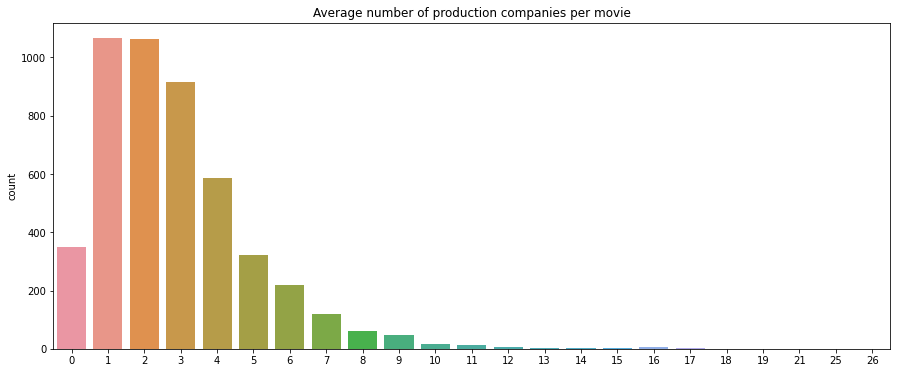

In [186]:
fig = plt.figure(figsize=(15,6))
sns.countplot(x=number_of_prod_comps)
number_of_prod_comps.mean()
plt.title('Average number of production companies per movie')

In [189]:
df_prods[df_prods['prod 1'].isnull()==True].head()

,budget,genre 1,genre 2,genre 3,genre 4,genre 5,genre 6,genre 7,genres,homepage,...,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1011,0,Horror,NaN,NaN,NaN,NaN,NaN,NaN,"[{""id"": 27, ""name"": ""Horror""}]",NaN,...,[],2006-08-08,0,0.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,NaN,The Tooth Fairy,4.3,13
1360,0,Drama,NaN,NaN,NaN,NaN,NaN,NaN,"[{""id"": 18, ""name"": ""Drama""}]",http://therebedragonsmovie.com/,...,[],2011-03-25,0,112.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,There Be Dragons,5.9,27
1669,0,Fantasy,Drama,Action,Thriller,Romance,NaN,NaN,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 18, ""na...",http://thepromisemovie.net,...,"[{""iso_3166_1"": ""CN"", ""name"": ""China""}, {""iso_...",2005-12-15,0,98.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,the promise,The Promise,5.0,29
1754,27000000,Adventure,Comedy,Drama,Family,NaN,NaN,NaN,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 35, ""...",NaN,...,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2008-08-06,44352417,117.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Some friends just fit together.,The Sisterhood of the Traveling Pants 2,6.0,238
1898,26000000,Comedy,Family,NaN,NaN,NaN,NaN,NaN,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10751, ""...",NaN,...,[],2006-12-08,0,90.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"No plane, no parents, no problem!",Unaccompanied Minors,5.4,66


In [192]:
df_prods = df_prods.melt(id_vars=df_prods.drop(prod_list,axis=1).columns, value_vars=prod_list).dropna(subset=['value'])

Text(0.5, 0, 'Production company')

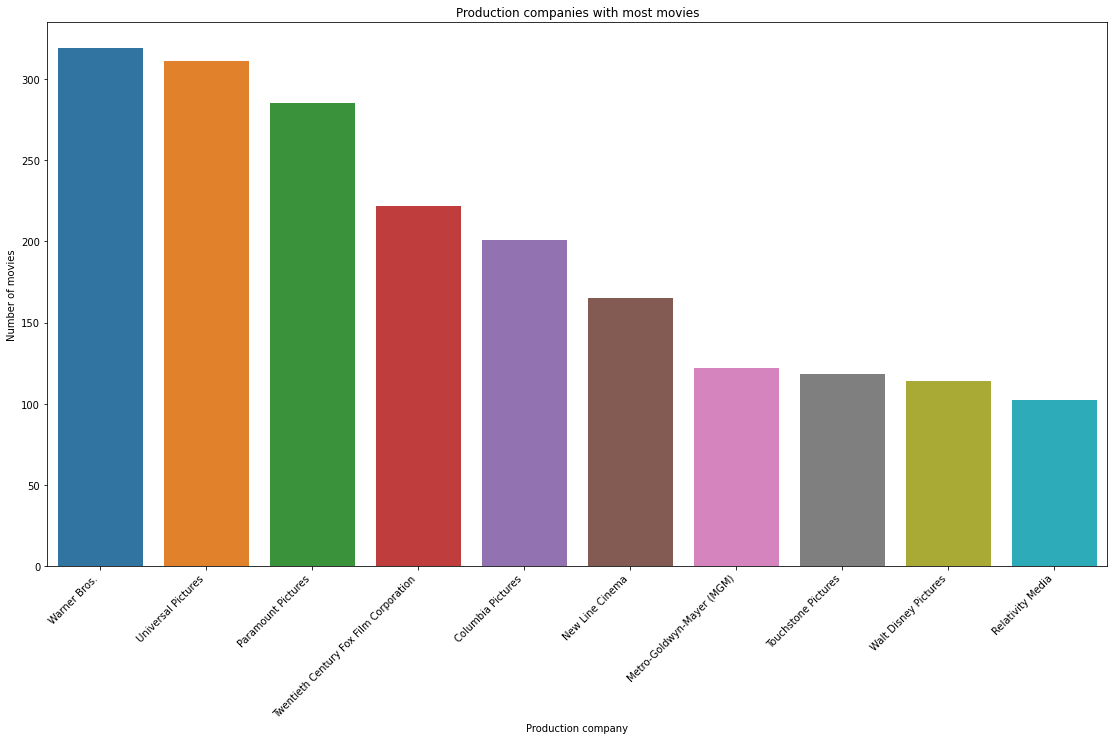

In [197]:
fig, ax = plt.subplots(figsize=(19,10))
df_prods.rename({'value':'prod_company'},axis=1,inplace=True)
top_10_prods = list(df_prods['prod_company'].value_counts().iloc[:10].index)
sns.countplot(x=df_prods['prod_company'], order=top_10_prods)
ax = ax.set_xticklabels(labels=top_10_prods, rotation=45, ha='right')
plt.title('Production companies with most movies')
plt.ylabel('Number of movies')
plt.xlabel('Production company')

In [198]:
df_prods_mean = df_prods.groupby(by='prod_company').mean()
df_prods_sum = df_prods.groupby(by='prod_company').sum()
df_prods_mean_top_10 = df_prods_mean[df_prods_mean.index.isin(top_10_prods)]
df_prods_sum_top_10 = df_prods_sum[df_prods_sum.index.isin(top_10_prods)]

C:\Users\Daniel\AppData\Local\Temp\ipykernel_9972\3069372485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_prods_mean = df_prods.groupby(by='prod_company').mean()
C:\Users\Daniel\AppData\Local\Temp\ipykernel_9972\3069372485.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_prods_sum = df_prods.groupby(by='prod_company').sum()


Text(0.5, 1.0, 'Average revenue for production companies with most movies')

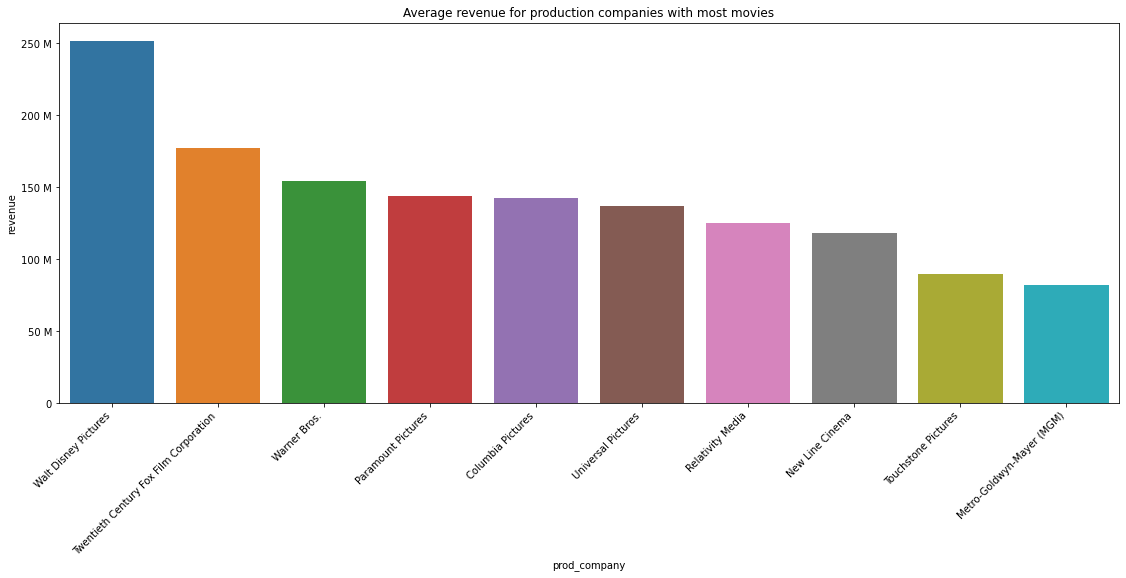

In [199]:


fig, ax = plt.subplots(1,1, figsize=(19,7))
sns.barplot( data=df_prods_mean_top_10,x=df_prods_mean_top_10.index,y='revenue',order=df_prods_mean_top_10['revenue'].sort_values(ascending=False).index)
ax.set_xticklabels(labels=df_prods_mean_top_10['revenue'].sort_values(ascending=False).index, rotation=45, ha='right')
ax.yaxis.set_major_formatter(fmt)
ax.set_title('Average revenue for production companies with most movies')


Text(0.5, 1.0, 'Total revenue for production companies with most movies')

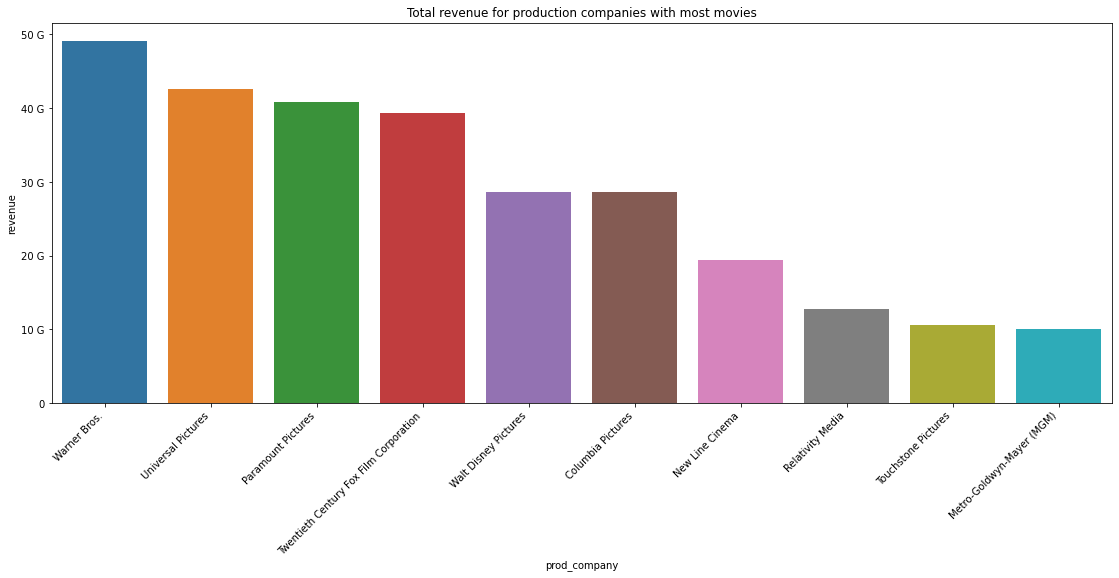

In [200]:
fig, ax = plt.subplots(figsize=(19,7))
sns.barplot(data=df_prods_sum_top_10,x=df_prods_sum_top_10.index,y='revenue',order=df_prods_sum_top_10['revenue'].sort_values(ascending=False).index)
ax.set_xticklabels(labels=df_prods_sum_top_10['revenue'].sort_values(ascending=False).index, rotation=45, ha='right')
ax.yaxis.set_major_formatter(fmt)
ax.set_title('Total revenue for production companies with most movies')


Text(0.5, 1.0, 'Average movie score for production companies with most movies')

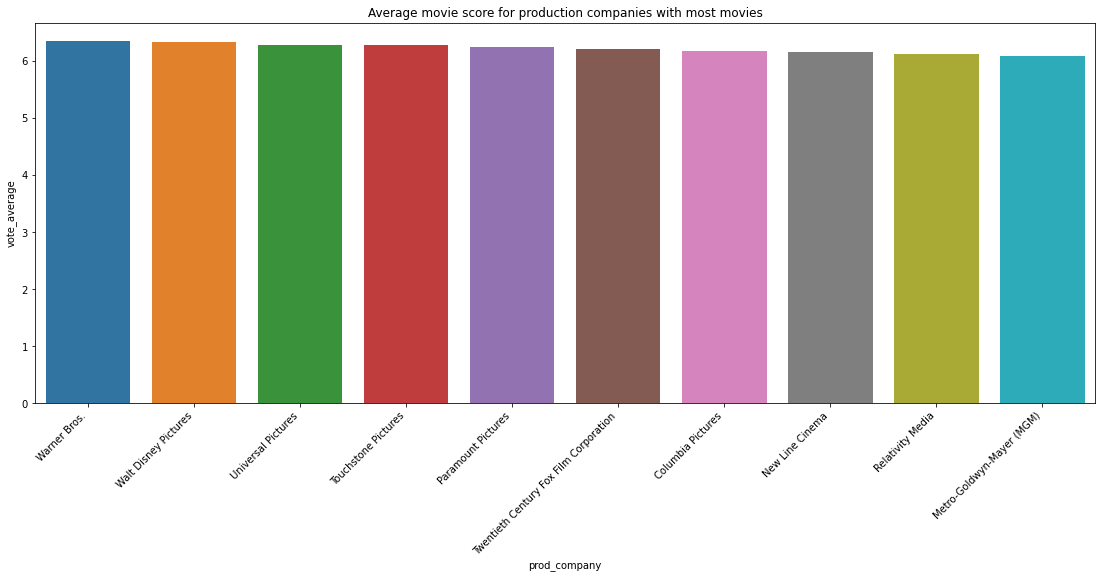

In [201]:
fig, ax = plt.subplots(figsize=(19,7))
sns.barplot(data=df_prods_mean_top_10,x=df_prods_mean_top_10.index,y='vote_average',order=df_prods_mean_top_10['vote_average'].sort_values(ascending=False).index)
ax.set_xticklabels(labels=df_prods_mean_top_10['vote_average'].sort_values(ascending=False).index, rotation=45, ha='right')
ax.set_title('Average movie score for production companies with most movies')


In [202]:
most_rev_prods = df_prods.groupby(by='prod_company').mean()['revenue'].sort_values(ascending=False)[:10]

C:\Users\Daniel\AppData\Local\Temp\ipykernel_9972\832773617.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_rev_prods = df_prods.groupby(by='prod_company').mean()['revenue'].sort_values(ascending=False)[:10]


Text(0.5, 1.0, 'Highest average revenue per movie per production company')

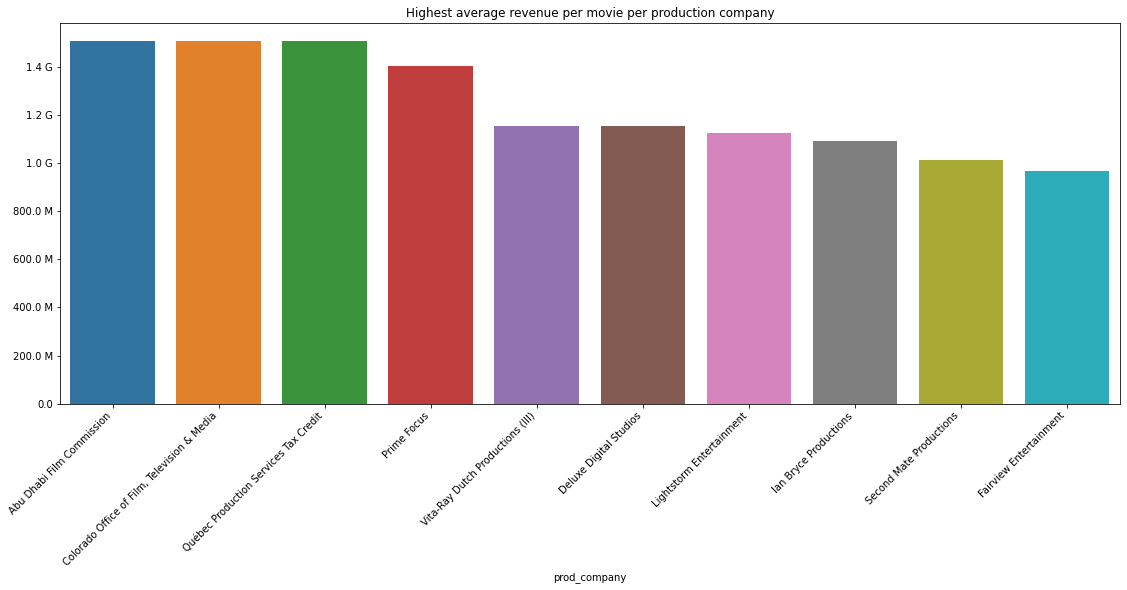

In [204]:
fmt = EngFormatter(places=1)
fig, ax = plt.subplots(figsize=(19,7))
sns.barplot(x=most_rev_prods.index,y=most_rev_prods.values)
ax.set_xticklabels(labels=most_rev_prods.index, rotation=45, ha='right')
ax.yaxis.set_major_formatter(fmt)
ax.set_title('Highest average revenue per movie per production company')


In [213]:
print(f"Abu Dhabi Film Commission movies: {df_prods[df_prods['prod_company']=='Abu Dhabi Film Commission']['title'].values}")
print(f"Colorado Office of Film, Television & Media movies: {df_prods[df_prods['prod_company']=='Colorado Office of Film, Television & Media']['title'].values}")
print(f"Québec Production Services Tax Credit movies: {df_prods[df_prods['prod_company']=='Québec Production Services Tax Credit']['title'].values}")
print(f"Prime Focus movies: {df_prods[df_prods['prod_company']=='Prime Focus']['title'].values}")
print(f"Vita-Ray Dutch Productions (III) movies: {df_prods[df_prods['prod_company']=='Vita-Ray Dutch Productions (III)']['title'].values}")

# print(df_prods[df_prods['prod_company']=='Colorado Office of Film, Television & Media']['title'])
# print(df_prods[df_prods['prod_company']=='Québec Production Services Tax Credit']['title'])
# print(df_prods[df_prods['prod_company']=='Prime Focus']['title'])
# print(df_prods[df_prods['prod_company']=='Vita-Ray Dutch Productions (III)']['title'])

Abu Dhabi Film Commission movies: ['Furious 7']
Colorado Office of Film, Television & Media movies: ['Furious 7']
Québec Production Services Tax Credit movies: ['Furious 7']
Prime Focus movies: ['Avengers: Age of Ultron']
Vita-Ray Dutch Productions (III) movies: ['Captain America: Civil War']


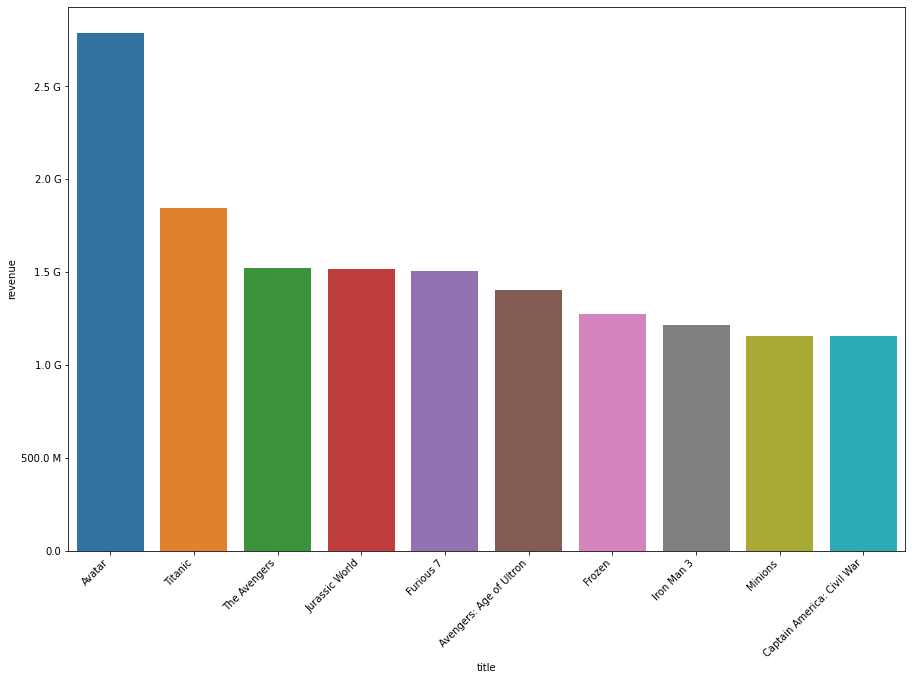

In [148]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=df,x='title',y='revenue', order=df[['title','revenue']].sort_values(by='revenue', ascending=False)['title'][:10])
ax.set_xticklabels(labels=df[['title','revenue']].sort_values(by='revenue', ascending=False)['title'][:10], rotation=45, ha='right')
ax.yaxis.set_major_formatter(fmt)